In [1]:
!pip install faiss-cpu torchvision opencv-python matplotlib torchreid -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.7/92.7 kB 2.1 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 50.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 57.0 MB/s eta 0:00:00:00:0100:01


In [ ]:
import torchvision.models as models
import torch.nn as nn
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Load the pre-trained ResNet50 model
model = models.resnet50(pretrained=True)

# Remove the final classification layer (fully connected layer) to extract features
model.fc = nn.Identity()

# Set the model to evaluation mode and move it to the appropriate device
model.eval().to(device)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 198MB/s] 


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [49]:
from PIL import Image

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

def extract_feature(image_path, model):
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0).to(device)
    with torch.no_grad():
        feature = model(image).squeeze().cpu().numpy()
    return feature.astype('float32')


In [50]:
import numpy as np
import os

train_dir = "/kaggle/input/vietnamese-foods/Images/Test"
train_features = []
train_paths = []

for root, dirs, files in os.walk(train_dir):
    for file in files:
        if file.lower().endswith(('.jpg', '.png', '.jpeg')):
            path = os.path.join(root, file)
            feat = extract_feature(path, model)
            train_features.append(feat)
            train_paths.append(path)

train_features = np.array(train_features)


In [51]:
import faiss

index = faiss.IndexFlatL2(train_features.shape[1])
index.add(train_features)


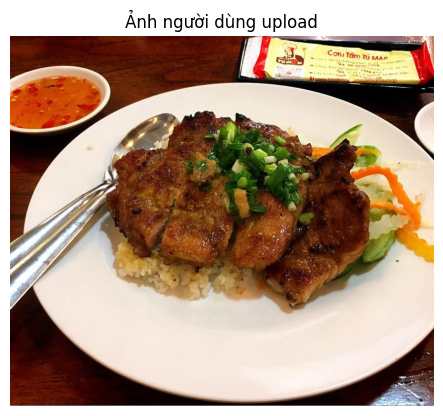

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import shutil

# ----- SOURCE PATH -----
uploaded_image_path = '/kaggle/input/vietnamese-foods/Images/Train/Com tam/13.jpg'  # Pre-uploaded user image

# ----- DISPLAY IMAGE -----
img = Image.open(uploaded_image_path)
plt.imshow(img)
plt.title("User Uploaded Image")
plt.axis("off")
plt.show()


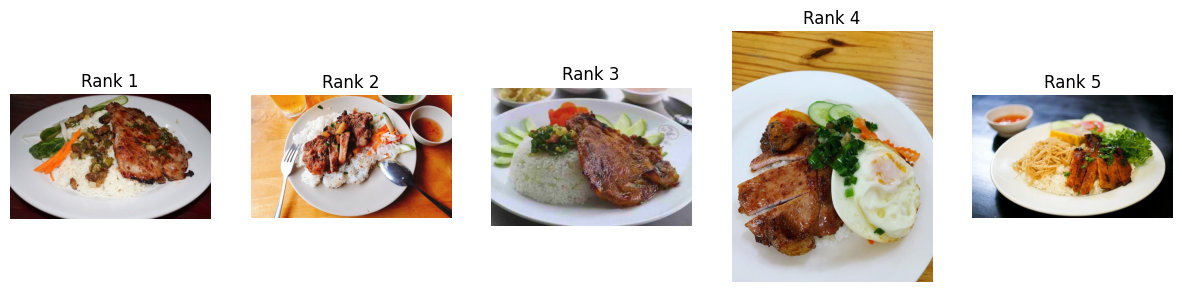

In [ ]:
import matplotlib.pyplot as plt

# Select one random image from the test set
sample_test_image = uploaded_image_path

# Extract its feature vector
query_feature = extract_feature(sample_test_image, model).reshape(1, -1)

# Retrieve the 5 most similar images
D, I = index.search(query_feature, k=5)

# Display the retrieved results
plt.figure(figsize=(15, 5))
for i, idx in enumerate(I[0]):
    img = Image.open(train_paths[idx])
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(f"Rank {i+1}")
    plt.axis('off')
plt.show()
